In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Reading the dataset
df = pd.read_csv('infection_data.csv') # Reading the dataset
print(f"Shape: {df.shape}\n\nSample:\n{df.head()}") # printing the shape and the first 5 rows

Shape: (1000, 3)

Sample:
      Test1     Test2  Infection
0  0.295578  1.289804          0
1  0.024831 -0.788522          1
2  0.131159  1.190200          0
3 -0.542544 -0.020009          1
4  0.694037  0.534599          1


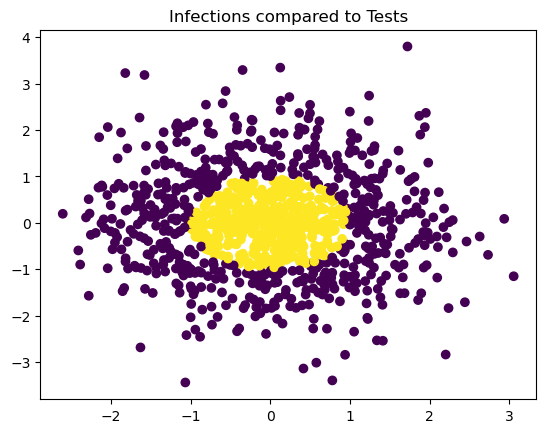

In [3]:
# Scatter plot of test1 versus test2 with the classes shown in different colors
plt.scatter(df['Test1'], df['Test2'], c=df['Infection']) # scatter plot of test1 versus test2
plt.title('Infections compared to Tests') # giving the plot a title
plt.show() # shows us that there is a clear separation between the 2 classes

In [4]:
# Check dataset for imbalance of classes
print(f"Check if dataset is balanced: {df.Infection.value_counts()}")

Check if dataset is balanced: Infection
0    597
1    403
Name: count, dtype: int64


__Clearly the dataset is imbalanced to start with - 50% more '0' class compared to '1'.__

That means, if I can predict all 0's correctly, my accuracy will be the highest for the given dataset and the given algorithm.

In [5]:
# Separate X and y and split the data

X = df.drop('Infection',axis=1) # drop the label column and assign the remaining columns to X
y = df['Infection'] # assign the label column to y
print(f"Shapes X and y: {X.shape,y.shape}") # print the shapes of X and y

Shapes X and y: ((1000, 2), (1000,))


In [6]:
# Splitting the data for training and testing (test_size = 15%, random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15,random_state=42)
print(X_train.shape,X_test.shape,type(X_train)) # number of training and testing samples

(850, 2) (150, 2) <class 'pandas.core.frame.DataFrame'>


In [7]:
# Use the standard logistic regression algorithm to develop a model
logreg = LogisticRegression()  # creating an instance of the logistic regression model
logreg.fit(X_train,y_train) # fitting the model to the training data
train_pred = logreg.predict(X_train) # predicting the training data
test_pred = logreg.predict(X_test) # predicting the testing data
print(f"Train predictions:\n{train_pred[:150]}\n\nTest predictions:\n{test_pred}")

Train predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Test predictions:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [8]:
''' Compute the model's accuracy on the training and test data '''
accuracy_train = accuracy_score(y_train, train_pred)*100 # calculating the accuracy of the model
accuracy_test = accuracy_score(y_test, test_pred)*100 # calculating the accuracy of the model

print(f"Accuracy of our training data: {accuracy_train}%") # printing the accuracy
print(f"Accuracy of our test data: {accuracy_test}%") # printing the accuracy

Accuracy of our training data: 59.411764705882355%
Accuracy of our test data: 61.33333333333333%


Confusion Matrix: 
[[92  0]
 [58  0]]



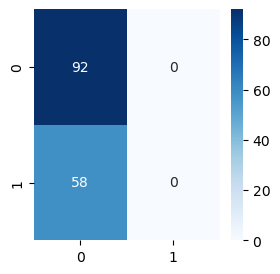

In [9]:
''' Print the confusion matrix for the test data '''
cm = confusion_matrix(y_test, test_pred) # Assign it to a variable
print(f"Confusion Matrix: \n{cm}\n") # Printing the confusion matrix

plt.figure(figsize=(3,3)) # setting the size of the plot
sns.heatmap(cm, annot=True, cmap='Blues') # creating the heatmap
plt.show() # showing the heatmap
# Top-left: True Positives
# Top-right: False Positives
# Bottom-left: False Negatives
# Bottom-right: True Negatives

In [10]:
# Plotting the decision boundary

intercept = logreg.intercept_
slopes = logreg.coef_[0]

print(f"Intercept: {intercept}\nSlopes:\n{slopes}\n")


# Compute coordinates for plotting decision boundary 
# theta0 + theta1*Test1 + theta2*Test2 = 0 (where theta0 is interceot and theta1 and theta2 are the slope values)

# Solving the above equation by taking Test1 = 0 and in the second case Test2 = 0 we get 2 cooridnates

# When Test1 = 0
# Test2 = -intercept / slopes[1]
Test2 = -intercept / (slopes[1]*np.max(X['Test1']))

# When Test2 = 0
# Test1 = -intercept / slopes[0]
Test1 = -intercept / (slopes[0]*np.max(X['Test1']))


# Create the X and the y cooridnates for plotting
Test_X = (np.max(X['Test1']),Test2[0])
Test_y = (Test1[0],np.max(X['Test1']))

print(f"Coordinates:\n Test_X: {Test_X} and Test_y: {Test_y}")



Intercept: [-0.38084374]
Slopes:
[ 0.01149127 -0.01917902]

Coordinates:
 Test_X: (3.0570231930362426, -6.495636533875915) and Test_y: (10.841272205696828, 3.0570231930362426)


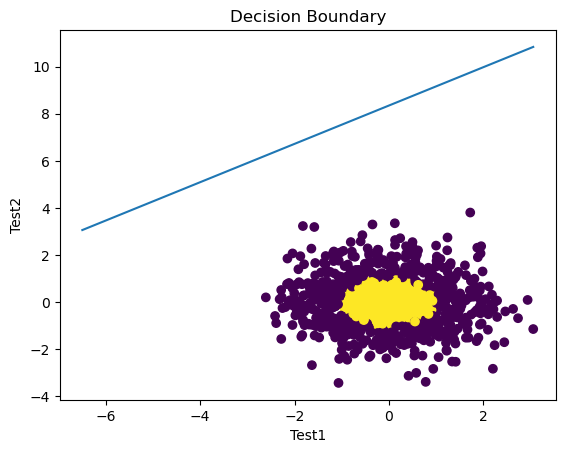

In [11]:
''' Plot the decision boundary '''

plt.scatter(df['Test1'],df['Test2'],c=df['Infection'])
plt.plot(Test_X,Test_y)
plt.xlabel('Test1') # labeling the x-axis
plt.ylabel('Test2') # labeling the y-axis
plt.title('Decision Boundary') # giving the plot a title
plt.show()

1. The shape of the decision boundary should be a circle, which means it should be quadratic with a degree of 2
2. The model is very acurate since the accuracy is almost at 100% for the test data and the confusion matrix has only 3 false negatives and 0 false positives
3. The difference between the training and test confusion matrix showed that false positives are almost nonexistant for the model since they are 0 for both heatmaps. False negatives for the training data were greater but that is still far less to the true negatives. Overall, the confusion matrix demonstrates the incredible accuracy of my machine learning model.